In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler


In [2]:
df0 = pd.read_csv("hand_data/0.csv", header=None)
df1 = pd.read_csv("hand_data/1.csv", header=None)
df2 = pd.read_csv("hand_data/2.csv", header=None)
df3 = pd.read_csv("hand_data/3.csv", header=None)

In [3]:
df = pd.concat([df0,df1,df2,df3])
data = df.values

In [4]:
x = df.loc[:,0:63]
y = df[64] 

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

In [7]:
x_train = x_train.reshape(x_train.shape[0]*x_train.shape[1], 1) 
x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1], 1)
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [8]:
x_train = x_train.reshape((-1, 8, 8))
x_test = x_test.reshape((-1, 8, 8))

In [9]:
y_train_categorical = np.eye(np.max(y_train) + 1)[y_train]
y_test_categorical = np.eye(np.max(y_test) + 1)[y_test]


In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))




Epoch 1/50


274/274 [==============================] - 8s 19ms/step - loss: 0.4709 - accuracy: 0.8208 - val_loss: 0.2869 - val_accuracy: 0.8993
Epoch 2/50
274/274 [==============================] - 4s 16ms/step - loss: 0.1943 - accuracy: 0.9349 - val_loss: 0.1495 - val_accuracy: 0.9507
Epoch 3/50
274/274 [==============================] - 4s 16ms/step - loss: 0.1192 - accuracy: 0.9605 - val_loss: 0.1292 - val_accuracy: 0.9592
Epoch 4/50
274/274 [==============================] - 5s 17ms/step - loss: 0.1012 - accuracy: 0.9643 - val_loss: 0.1276 - val_accuracy: 0.9599
Epoch 5/50
274/274 [==============================] - 4s 16ms/step - loss: 0.0954 - accuracy: 0.9687 - val_loss: 0.1215 - val_accuracy: 0.9586
Epoch 6/50
274/274 [==============================] - 8s 31ms/step - loss: 0.0780 - accuracy: 0.9739 - val_loss: 0.1537 - val_accuracy: 0.9555
Epoch 7/50
274/274 [==============================] - 9s 33ms/step - loss: 0.0759 - accuracy: 0.9749 - val_loss: 0.1171 - val_accuracy: 0

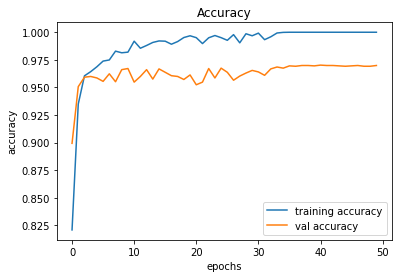

In [12]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

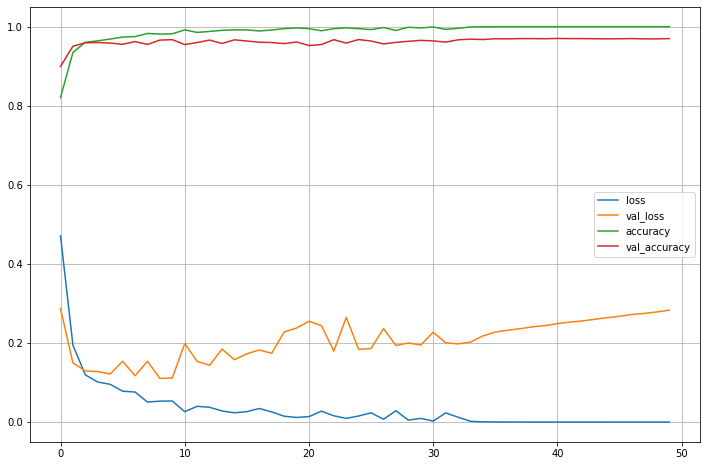

In [13]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12,8))

for each in plot_target:
    plt.plot(history.history[each], label = each)
    
plt.legend()
plt.grid()
plt.show()